In [ ]:
import time, numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree

df = pd.read_csv("Housing.csv")

#Exploratory Data Analysis

In [ ]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
#Cleaning data
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


# Machine learning

In [ ]:
categorical_features = [
    'mainroad','guestroom','basement','hotwaterheating',
    'airconditioning','prefarea','furnishingstatus'
]
df_encoded = pd.get_dummies(
    df, columns=categorical_features, drop_first=True, dtype=int
)

In [ ]:
y = df_encoded["price"].values.astype(float)
X = df_encoded.drop(columns=["price"]).copy()

#Train/test dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
430,2500,2,1,1,0,0,0,0,0,1,0,0,1
202,4120,2,1,1,1,1,0,1,0,0,0,1,0
490,4350,3,1,2,1,0,0,0,1,0,0,0,1
139,6360,3,1,1,2,1,1,1,0,1,1,0,0
237,5010,3,1,2,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,5900,4,2,2,1,0,0,1,0,0,0,0,1
393,7424,3,1,1,0,0,0,0,0,0,0,0,1
75,4260,4,2,2,0,1,0,0,1,0,0,1,0
337,2145,4,2,1,0,1,0,1,0,0,1,0,1


In [ ]:
def metrics(y_test,y_test_lr):
  return {
      "MSE": np.sqrt(mean_squared_error(y_test, y_test_lr)),
      "R2": r2_score(y_test, y_test_lr),
      "MAE": mean_absolute_error(y_test, y_test_lr)
  }

In [ ]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_lr = lr.predict(X_train)
y_test_lr = lr.predict(X_test)

In [ ]:
print("Linear Regression")
print("Train:", metrics(y_train, y_train_lr))
print("Test :", metrics(y_test,  y_test_lr))

Linear Regression
Train: {'MSE': np.float64(1016697.0743240749), 'R2': 0.6994701592416851, 'MAE': 753502.2614833502}
Test : {'MSE': np.float64(1211348.9017686697), 'R2': 0.5876135320781947, 'MAE': 849809.4672979299}


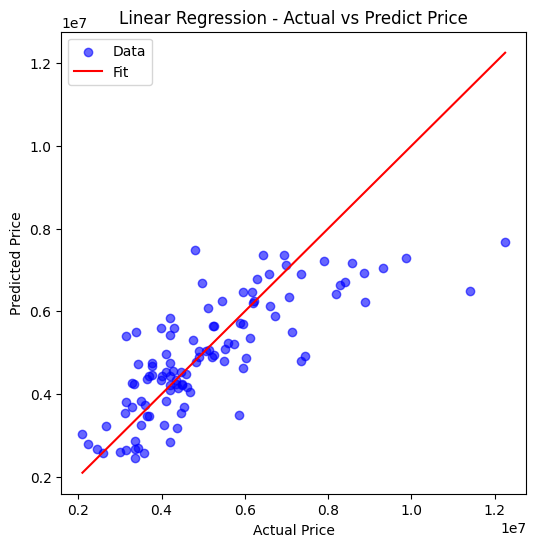

Accuracy Score for Linear Regression model: 0.5876135320781947


In [ ]:
# Actual vs Predicted (LR)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_lr, alpha=0.6, label = "Data", color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], label = "Fit", color="red")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.title("Linear Regression - Actual vs Predict Price")
plt.show()

print("Accuracy Score for Linear Regression model:", lr.score(X_test, y_test))

#Decision Tree (with pruning)

In [ ]:
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=101)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=101)

In [ ]:
y_train_tree = dt.predict(X_train)
y_test_tree = dt.predict(X_test)

In [ ]:
print("Decision Tree")
print("Train:", metrics(y_train, y_train_tree))
print("Test :", metrics(y_test,  y_test_tree))

Decision Tree
Train: {'MSE': np.float64(959014.8738172159), 'R2': 0.7326038564930153, 'MAE': 707525.0880035044}
Test : {'MSE': np.float64(1540082.5481469224), 'R2': 0.3334175040004044, 'MAE': 1085615.450970008}


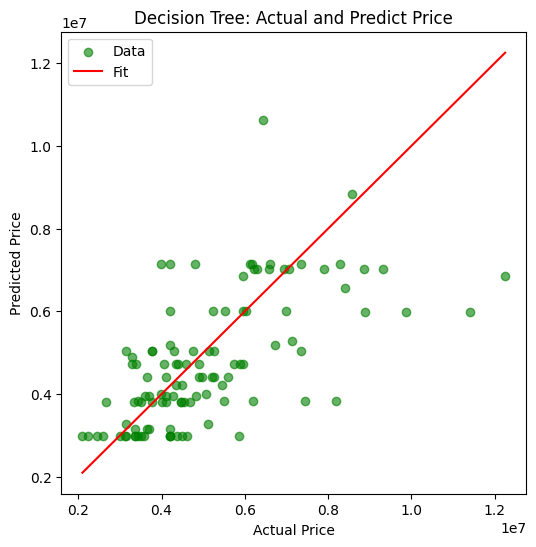

Accuracy Score for Decision Tree model: 0.3334175040004044


In [ ]:
# Actual vs Predicted (Tree)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_tree, alpha=0.6, label = "Data", color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], label = "Fit", color="red")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.title("Decision Tree: Actual and Predict Price")
plt.show()

print("Accuracy Score for Decision Tree model:", dt.score(X_test, y_test))

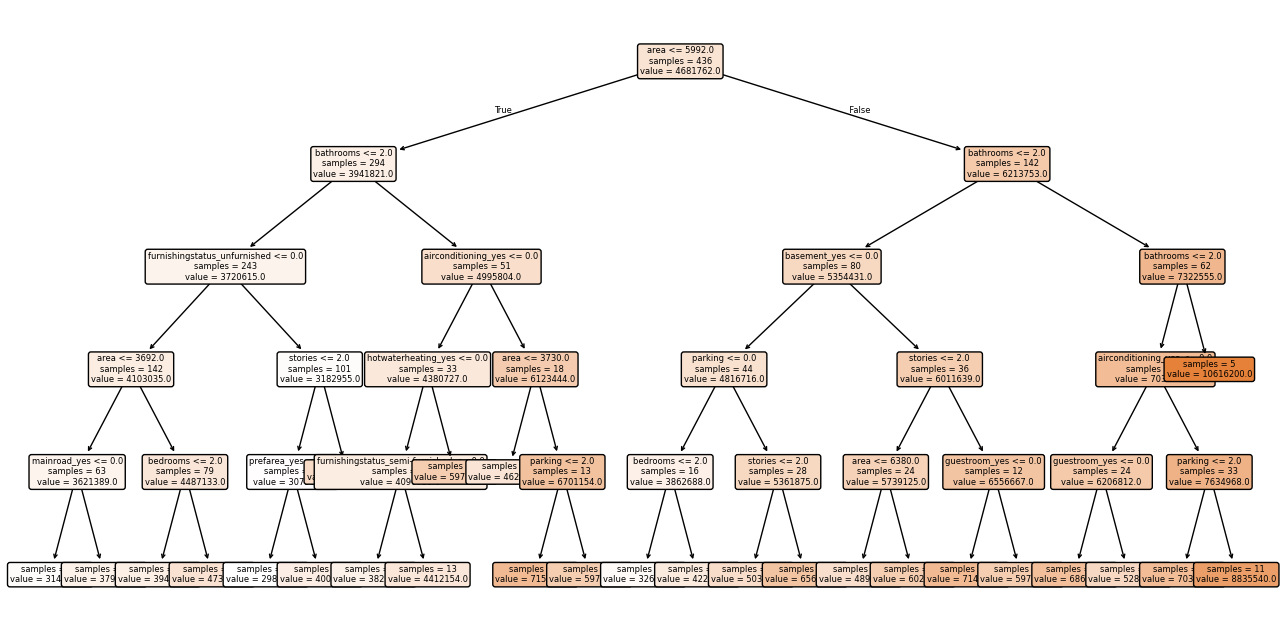

In [ ]:
plt.figure(figsize=(16,8))
plot_tree(dt, feature_names=X_train.columns, filled=True, fontsize=6,
          rounded=True, impurity=False, precision=0,max_depth = 5)
plt.show()


#Leaning Curve

In [ ]:
def plot_learning_curve(model, X, y, title):
  cv = KFold(n_splits=5, shuffle=True, random_state=42)
  sizes = np.linspace(0.1, 1.0, 6)
  sizes, tr, cvv = learning_curve(model, X, y, cv=cv,
                                    scoring="r2", train_sizes=sizes)
  plt.figure(figsize=(6,6))
  plt.plot(sizes, tr.mean(axis=1), label="Train Score")
  plt.plot(sizes, cvv.mean(axis=1), label="Cross Val Score")
  plt.xlabel("Training size")
  plt.ylabel("R2")
  plt.title(title)
  plt.legend()
  plt.show()

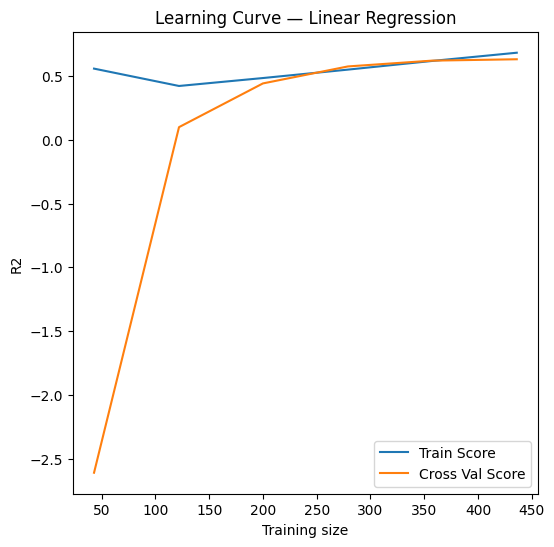

In [ ]:
plot_learning_curve(lr, X, y, "Learning Curve — Linear Regression")


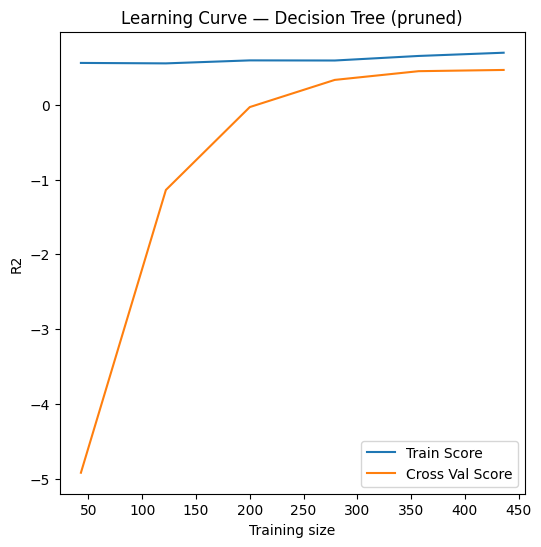

In [ ]:
plot_learning_curve(dt, X, y, "Learning Curve — Decision Tree (pruned)")

#Time fit predict

In [ ]:
def quick_time(est, Xtr, ytr, Xte, name):
    fresh = est.__class__(**est.get_params())
    t0 = time.perf_counter(); fresh.fit(Xtr, ytr); fit_t = time.perf_counter()-t0
    t1 = time.perf_counter(); _ = fresh.predict(Xte); pred_t = time.perf_counter()-t1
    print(f"[{name}] fit: {fit_t: }s | predict: {pred_t:}s")
    print(f"[{name}] fit: {fit_t: }s | predict: {pred_t:}s")

quick_time(lr, X_train, y_train, X_test, "Linear Regression")
quick_time(dt,       X_train, y_train, X_test, "Decision Tree")

[Linear Regression] fit:  0.003082555000219145s | predict: 0.0013490100000126404s
[Linear Regression] fit:  0.003082555000219145s | predict: 0.0013490100000126404s
[Decision Tree] fit:  0.0029477919997589197s | predict: 0.0018508910002310586s
[Decision Tree] fit:  0.0029477919997589197s | predict: 0.0018508910002310586s


#Residual

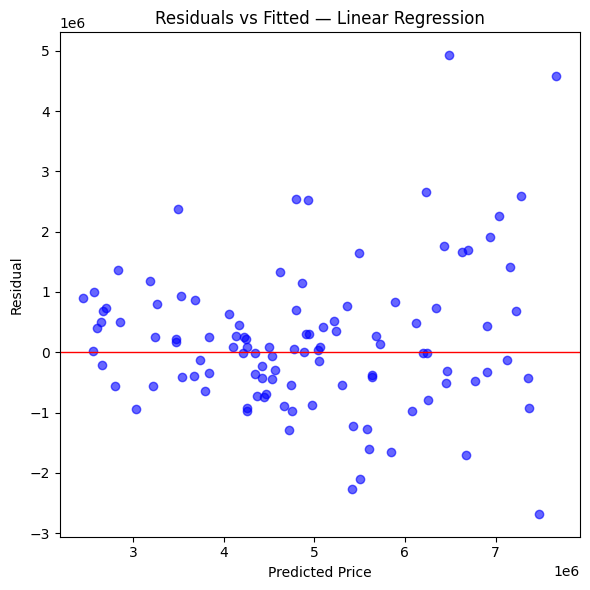

In [ ]:
yhat_lr = y_test_lr
res_lr  = y_test - yhat_lr

plt.figure(figsize=(6,6))
plt.scatter(yhat_lr, res_lr, alpha=0.6, color="blue")
plt.axhline(0, color='red', lw=1)
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residuals vs Fitted — Linear Regression")
plt.tight_layout()
plt.show()

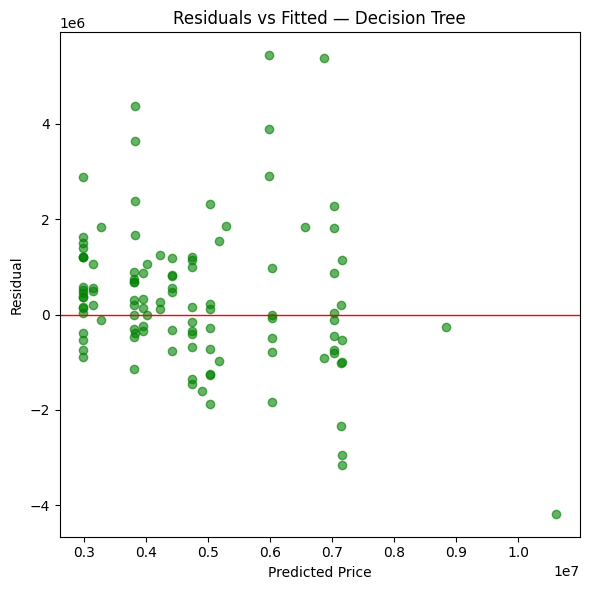

In [ ]:
yhat_dt = y_test_tree
res_dt  = y_test - yhat_dt

plt.figure(figsize=(6,6))
plt.scatter(yhat_dt, res_dt, alpha=0.6, color="green")
plt.axhline(0, color='red', lw=1)
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residuals vs Fitted — Decision Tree")
plt.tight_layout()
plt.show()